# PCA and k-means

## Setting up

In [58]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# numpy and scipy libraries
import numpy as np
from scipy import stats

# matplotlib libraries
import matplotlib.pyplot as plt

# added: collections library
import collections

In [59]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [60]:
import sys
# Change the path below to the path where your folder locates
# where you have util.py
### ========== TODO : START ========== ###
sys.path.append('/content/gdrive/MyDrive/schoolwork/3rd_year/winter/cs_m146/hw_4')
### ========== TODO : START ========== ###


In [61]:
import util
from util import *

## Point, Cluster and Set of Clusters classes

In [62]:
######################################################################
# classes
######################################################################

class Point(object) :
    
    def __init__(self, name, label, attrs) :
        """
        A data point.
        
        Attributes
        --------------------
            name  -- string, name
            label -- string, label
            attrs -- string, features
        """
        
        self.name = name
        self.label = label
        self.attrs = attrs
    
    
    #============================================================
    # utilities
    #============================================================
    
    def distance(self, other) :
        """
        Return Euclidean distance of this point with other point.
        
        Parameters
        --------------------
            other -- Point, point to which we are measuring distance
        
        Returns
        --------------------
            dist  -- float, Euclidean distance
        """
        # Euclidean distance metric
        return np.linalg.norm(self.attrs-other.attrs)
    
    
    def __str__(self) :
        """
        Return string representation.
        """
        return "%s : (%s, %s)" % (self.name, str(self.attrs), self.label)

In [63]:
class Cluster(object) :
    
    def __init__(self, points) :
        """
        A cluster (set of points).
        
        Attributes
        --------------------
            points -- list of Points, cluster elements
        """        
        self.points = points
    
    
    def __str__(self) :
        """
        Return string representation.
        """
        s = ""
        for point in self.points :
            s += str(point)
        return s
        
    #============================================================
    # utilities
    #============================================================
    
    def purity(self) :
        """
        Compute cluster purity.
        
        Returns
        --------------------
            n           -- int, number of points in this cluster
            num_correct -- int, number of points in this cluster
                                with label equal to most common label in cluster
        """        
        labels = []
        for p in self.points :
            labels.append(p.label)
        
        cluster_label, count = stats.mode(labels)
        return len(labels), np.float64(count)
    
    
    def centroid(self) :
        """
        Compute centroid of this cluster.
        
        Returns
        --------------------
            centroid -- Point, centroid of cluster
        """
        
        ### ========== TODO : START ========= ###
        # part 2b: implement
        # set the centroid label to any value (e.g. the most common label in this cluster)
        point_coords = [p.attrs for p in self.points]
        centroid = Point("centroid", 0, np.mean(point_coords, axis=0))
        return centroid
        ### ========== TODO : END ========== ###
    
    
    def medoid(self) :
        """
        Compute medoid of this cluster, that is, the point in this cluster
        that is closest to all other points in this cluster.
        
        Returns
        --------------------
            medoid -- Point, medoid of this cluster
        """
        
        ### ========== TODO : START ========== ###
        # part 2b: implement

        # for each point, find the sum of the distances to all other points
        dist_to_others = []
        for p1 in self.points:
          p1_dist = 0
          
          # sum up distance from p1 to all other points
          for p2 in self.points:
            p1_dist += p1.distance(p2)
          
          dist_to_others.append(p1_dist)

        # set medoid to the point with the minimum cumulative distance to
        # all other points
        index_of_medoid = dist_to_others.index(min(dist_to_others))
        medoid = self.points[index_of_medoid]
        return medoid
        ### ========== TODO : END ========== ###
    
    
    def equivalent(self, other) :
        """
        Determine whether this cluster is equivalent to other cluster.
        Two clusters are equivalent if they contain the same set of points
        (not the same actual Point objects but the same geometric locations).
        
        Parameters
        --------------------
            other -- Cluster, cluster to which we are comparing this cluster
        
        Returns
        --------------------
            flag  -- bool, True if both clusters are equivalent or False otherwise
        """
        
        if len(self.points) != len(other.points) :
            return False
        
        matched = []
        for point1 in self.points :
            for point2 in other.points :
                if point1.distance(point2) == 0 and point2 not in matched :
                    matched.append(point2)
        return len(matched) == len(self.points)

In [64]:
class ClusterSet(object):

    def __init__(self) :
        """
        A cluster set (set of clusters).
        
        Parameters
        --------------------
            members -- list of Clusters, clusters that make up this set
        """
        self.members = []
    
    
    #============================================================
    # utilities
    #============================================================    
    
    def centroids(self) :
        """
        Return centroids of each cluster in this cluster set.
        
        Returns
        --------------------
            centroids -- list of Points, centroids of each cluster in this cluster set
        """
        
        ### ========== TODO : START ========== ###
        # part 2b: implement
        centroids = [cluster.centroid() for cluster in self.members]
        return centroids
        ### ========== TODO : END ========== ###
    
    
    def medoids(self) :
        """
        Return medoids of each cluster in this cluster set.
        
        Returns
        --------------------
            medoids -- list of Points, medoids of each cluster in this cluster set
        """
        
        ### ========== TODO : START ========== ###
        # part 2b: implement
        medoids = [cluster.medoid() for cluster in self.members]
        return medoids
        ### ========== TODO : END ========== ###
    
    
    def score(self) :
        """
        Compute average purity across clusters in this cluster set.
        
        Returns
        --------------------
            score -- float, average purity
        """
        
        total_correct = 0
        total = 0
        for c in self.members :
            n, n_correct = c.purity()
            total += n
            total_correct += n_correct
        return total_correct / float(total)
    
    
    def equivalent(self, other) :
        """ 
        Determine whether this cluster set is equivalent to other cluster set.
        Two cluster sets are equivalent if they contain the same set of clusters
        (as computed by Cluster.equivalent(...)).
        
        Parameters
        --------------------
            other -- ClusterSet, cluster set to which we are comparing this cluster set
        
        Returns
        --------------------
            flag  -- bool, True if both cluster sets are equivalent or False otherwise
        """
        
        if len(self.members) != len(other.members):
            return False
        
        matched = []
        for cluster1 in self.members :
            for cluster2 in other.members :
                if cluster1.equivalent(cluster2) and cluster2 not in matched:
                    matched.append(cluster2)
        return len(matched) == len(self.members)
    
    
    #============================================================
    # manipulation
    #============================================================

    def add(self, cluster):
        """
        Add cluster to this cluster set (only if it does not already exist).
        
        If the cluster is already in this cluster set, raise a ValueError.
        
        Parameters
        --------------------
            cluster -- Cluster, cluster to add
        """
        
        if cluster in self.members :
            raise ValueError
        
        self.members.append(cluster)

## k-means and k-medoids algorithms

In [65]:
######################################################################
# k-means and k-medoids
######################################################################

def random_init(points, k) :
    """
    Randomly select k unique elements from points to be initial cluster centers.
    
    Parameters
    --------------------
        points         -- list of Points, dataset
        k              -- int, number of clusters
    
    Returns
    --------------------
        initial_points -- list of k Points, initial cluster centers
    """
    ### ========== TODO : START ========== ###
    # part 2c: implement (hint: use np.random.choice)
    return np.random.choice(points, size=k, replace=False)
    ### ========== TODO : END ========== ###


def cheat_init(points) :
    """
    Initialize clusters by cheating!
    
    Details
    - Let k be number of unique labels in dataset.
    - Group points into k clusters based on label (i.e. class) information.
    - Return medoid of each cluster as initial centers.
    
    Parameters
    --------------------
        points         -- list of Points, dataset
    
    Returns
    --------------------
        initial_points -- list of k Points, initial cluster centers
    """
    ### ========== TODO : START ========== ###
    # part 2f: implement
    
    # find the value of k
    all_labels = [p.label for p in points]
    k = len(np.unique(all_labels))

    # group points according to their labels
    clusters = [[] for i in range(k)]
    for p in points:
      clusters[p.label - 1].append(p)

    # make a ClusterSet with our new clusters
    set_of_clusters = ClusterSet()
    for c in clusters:
      set_of_clusters.add(Cluster(c))

    # return a list containing the medoids of each cluster
    initial_points = set_of_clusters.medoids()
    return initial_points
    ### ========== TODO : END ========== ###


def kMeans(points, k, average=ClusterSet.centroids, init='random', plot=False):
    """
    Cluster points into k clusters using variations of k-means algorithm.
    
    Parameters
    --------------------
        points  -- list of Points, dataset
        k       -- int, number of clusters
        average -- method of ClusterSet
                   determines how to calculate average of points in cluster
                   allowable: ClusterSet.centroids, ClusterSet.medoids
        init    -- string, method of initialization
                   allowable: 
                       'cheat'  -- use cheat_init to initialize clusters
                       'random' -- use random_init to initialize clusters
        plot    -- bool, True to plot clusters with corresponding averages
                         for each iteration of algorithm
    
    Returns
    --------------------
        k_clusters -- ClusterSet, k clusters
    """
    
    ### ========== TODO : START ========== ###
    # part 2c: implement
    # Hints:
    #   (1) On each iteration, keep track of the new cluster assignments
    #       in a separate data structure. Then use these assignments to create
    #       a new ClusterSet object and update the centroids.
    #   (2) Repeat until the clustering no longer changes.
    #   (3) To plot, use plot_clusters(...).

    k_clusters = ClusterSet()

    # initialize center for each cluster
    centers = None
    if (init == 'cheat'):
      centers = cheat_init(points)
    else:
      centers = random_init(points, k)
    
    iteration = 0
    while (1):
      # create new cluster assignments
      clusters = [[] for i in range(k)]
      for p in points:
        dist_to_centers = [p.distance(p2) for p2 in centers]
        cluster_assignment = dist_to_centers.index(min(dist_to_centers))
        clusters[cluster_assignment].append(p)
      
      # use assignments to create new ClusterSet object
      new_clusters = ClusterSet()
      for c in clusters:
        new_clusters.add(Cluster(c))

      # update the cluster centers
      centers = average(new_clusters)

      # plot clusters with corresponding averages, if desired
      iteration += 1
      if (plot):
        plot_clusters(new_clusters, "clusters after iteration " + str(iteration), \
                      average)

      # stop if clustering no longer changes
      if k_clusters.equivalent(new_clusters):
        break
      else:
        k_clusters = new_clusters

    return k_clusters, iteration
    ### ========== TODO : END ========== ###


def kMedoids(points, k, init='random', plot=False) :
    """
    Cluster points in k clusters using k-medoids clustering.
    See kMeans(...).
    """
    ### ========== TODO : START ========== ###
    # part 2e: implement
    k_clusters, iterations = kMeans(points, k, average=ClusterSet.medoids, init=init, plot=plot)
    return k_clusters, iterations
    ### ========== TODO : END ========== ###

## Utilities

In [66]:
######################################################################
# helper functions
######################################################################

def build_face_image_points(X, y) :
    """
    Translate images to (labeled) points.
    
    Parameters
    --------------------
        X     -- numpy array of shape (n,d), features (each row is one image)
        y     -- numpy array of shape (n,), targets
    
    Returns
    --------------------
        point -- list of Points, dataset (one point for each image)
    """
    
    n,d = X.shape
    
    images = collections.defaultdict(list) # key = class, val = list of images with this class
    for i in range(n) :
        images[y[i]].append(X[i,:])
    
    points = []
    for face in images :
        count = 0
        for im in images[face] :
            points.append(Point(str(face) + '_' + str(count), face, im))
            count += 1

    return points


def plot_clusters(clusters, title, average) :
    """
    Plot clusters along with average points of each cluster.

    Parameters
    --------------------
        clusters -- ClusterSet, clusters to plot
        title    -- string, plot title
        average  -- method of ClusterSet
                    determines how to calculate average of points in cluster
                    allowable: ClusterSet.centroids, ClusterSet.medoids
    """
    
    plt.figure()
    np.random.seed(20)
    label = 0
    colors = {}
    centroids = average(clusters)
    for c in centroids :
        coord = c.attrs
        plt.plot(coord[0],coord[1], 'ok', markersize=12)
    for cluster in clusters.members :
        label += 1
        colors[label] = np.random.rand(3,)
        for point in cluster.points :
            coord = point.attrs
            plt.plot(coord[0], coord[1], 'o', color=colors[label])
    plt.title(title)
    plt.show()


def generate_points_2d(N, seed=1234) :
    """
    Generate toy dataset of 3 clusters each with N points.
    
    Parameters
    --------------------
        N      -- int, number of points to generate per cluster
        seed   -- random seed
    
    Returns
    --------------------
        points -- list of Points, dataset
    """
    np.random.seed(seed)
    
    mu = [[0,0.5], [1,1], [2,0.5]]
    sigma = [[0.1,0.1], [0.25,0.25], [0.15,0.15]]
    
    label = 0
    points = []
    for m,s in zip(mu, sigma) :
        label += 1
        for i in range(N) :
            x = random_sample_2d(m, s)
            points.append(Point(str(label)+'_'+str(i), label, x))
    
    return points

## Main function

running part 1A...
Total dataset size:
	num_samples: 1867
	num_features: 1850
	num_classes: 19


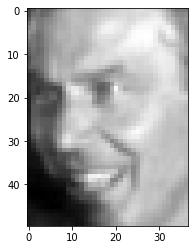

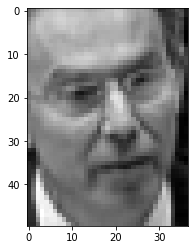

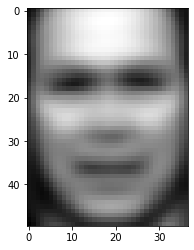

running part 1B...


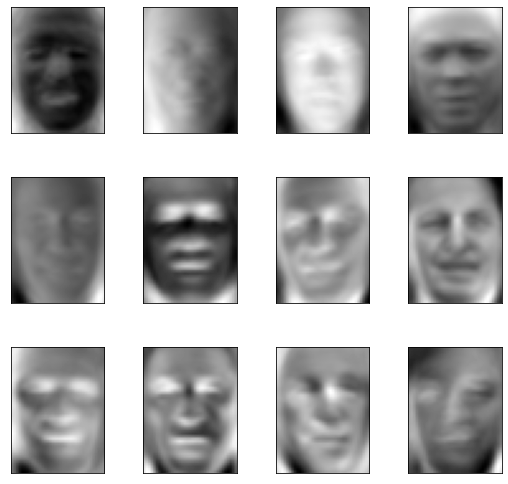

running part 1C...
for l=1


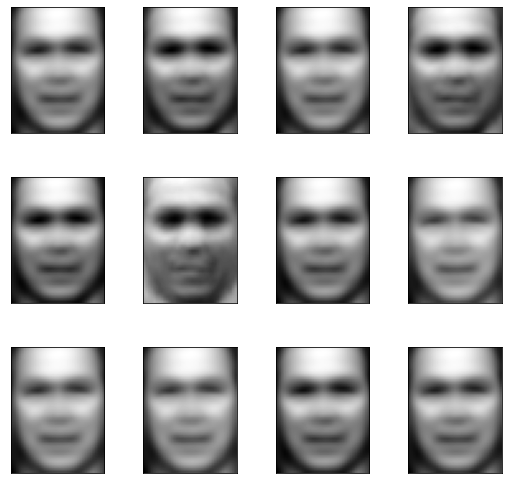

for l=10


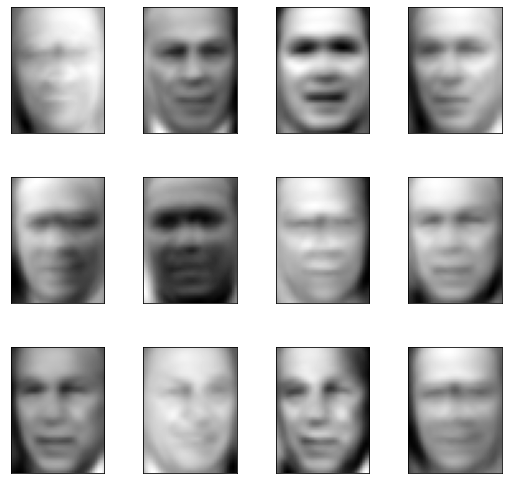

for l=50


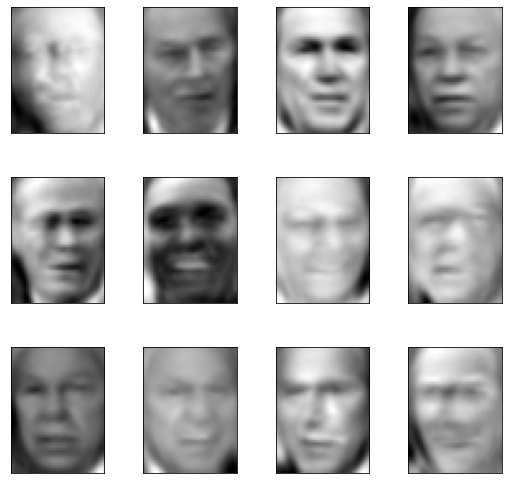

for l=100


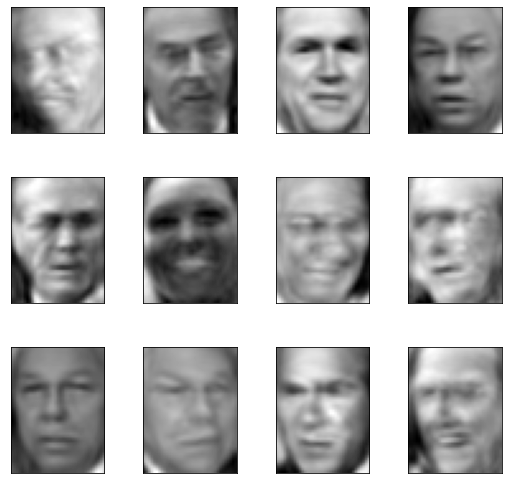

for l=500


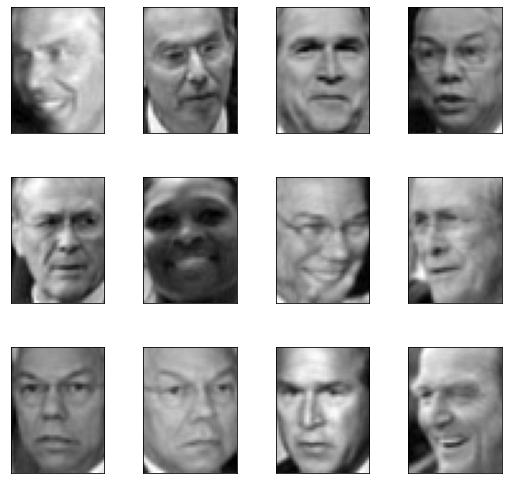

for l=1288


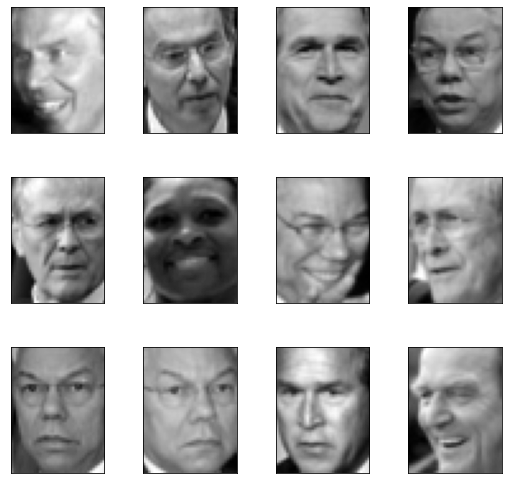

running part 2d...


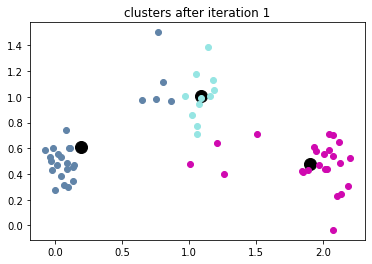

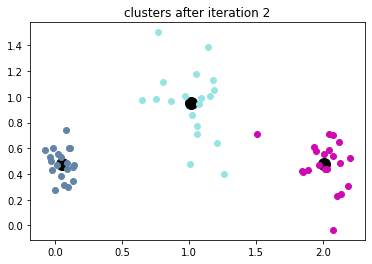

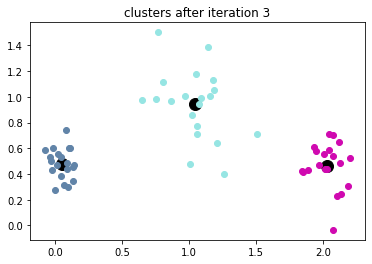

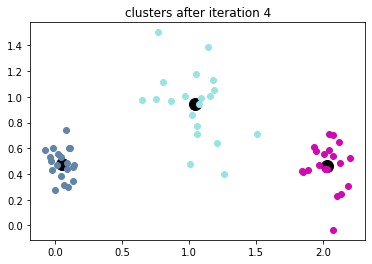

running part 2e...


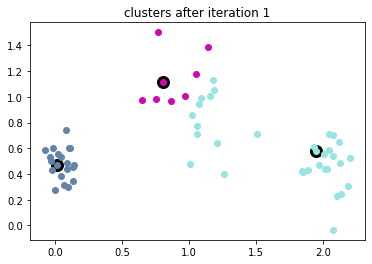

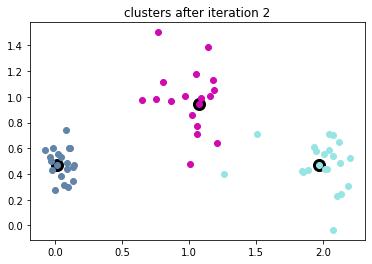

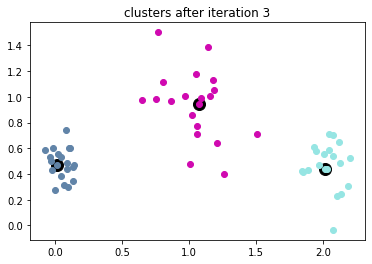

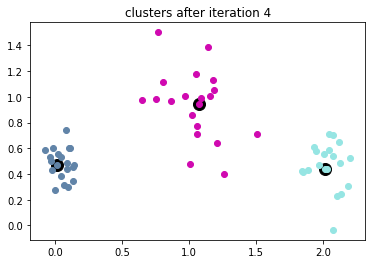

running part 2f...
'cheat_init' with KMeans...


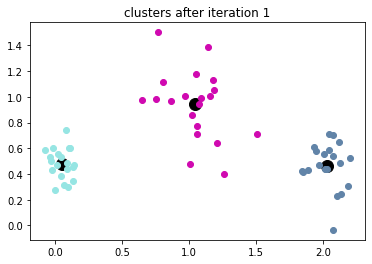

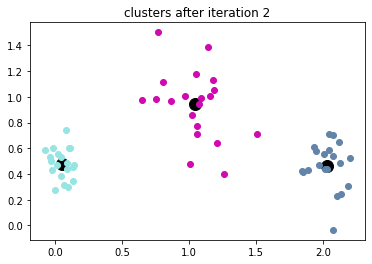

'cheat_init' with KMedoids...


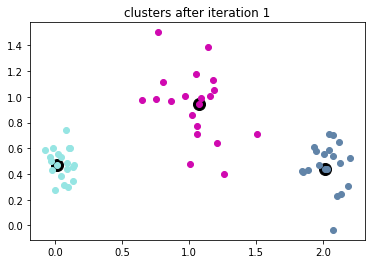

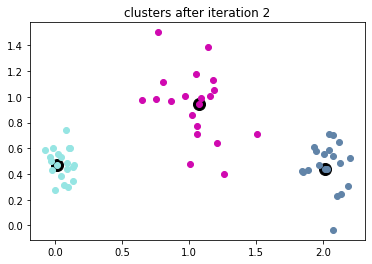

running part 3a...
KMeans scores on image dataset:
average = 0.617
min = 0.550
max = 0.775
iterations = 7.700
KMedoids scores on image dataset:
average = 0.632
min = 0.575
max = 0.725000
iterations = 3.900
running part 3b...


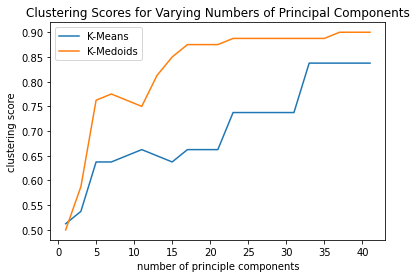

running part 3c...
most discriminative pair:  (9, 16)


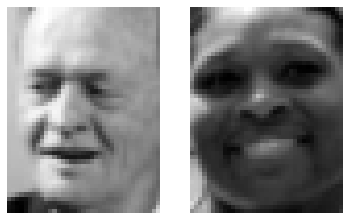

least discriminative pair:  (4, 5)


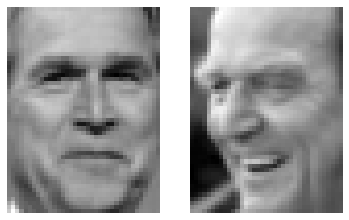

In [73]:
######################################################################
# main
######################################################################

def main() :
    ### ========== TODO : START ========== ###
    # part 1: explore LFW data set

    # PART 1A
    print("running part 1A...")

    # get LFW dataset
    X, y = get_lfw_data()

    # plot a couple of the input images
    show_image(X[0])
    show_image(X[1])

    # compute the mean of all the images, and plot it
    mean_image = np.mean(X, axis=0)
    show_image(mean_image)
    # END PART 1A

    # PART 1B
    print("running part 1B...")

    # perform PCA on the data
    U, mu = PCA(X)

    # show the top 12 eigenfaces
    plot_gallery([vec_to_image(U[:,i]) for i in range(12)])
    #END PART 1B

    # PART 1C
    print("running part 1C...")

    # select the principle components of the data
    U, mu = PCA(X)

    # select a number l of components to use
    for l in [1, 10, 50, 100, 500, 1288]:
      print("for l=%d" % l)

      # project images to lower dimensional space
      Z, Ul = apply_PCA_from_Eig(X, U, l, mu)

      # reconstruct high-dimensional images from low-dimensional ones
      x_rec = reconstruct_from_PCA(Z, Ul, mu)

      # plot the first 12 images of the dataset
      plot_gallery(x_rec[0:12])

    #END PART 1C

    ### ========== TODO : END ========== ###

    
    ### ========== TODO : START ========== ###
    # part 2d-2f: cluster toy dataset
    # PART 2D
    print("running part 2d...")
    np.random.seed(1234)

    # generate three clusters, each containing 20 points
    points = generate_points_2d(20)

    # run kMeans with random initialization and generate plots
    kMeans(points, 3, plot=True)
    # END PART 2D

    # PART 2E
    print("running part 2e...")
    kMedoids(points, 3, plot=True)
    # END PART 2E

    # PART 2F
    print("running part 2f...")
    print("'cheat_init' with KMeans...")
    kMeans(points, 3, init='cheat', plot=True)
    print("'cheat_init' with KMedoids...")
    kMedoids(points, 3, init='cheat', plot=True)
    # END PART 2F
    
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###    
    # part 3a: cluster faces
    print("running part 3a...")
    np.random.seed(1234)

    # make new image dataset and translate these images to labeled points
    X1, y1 = util.limit_pics(X, y, [4, 6, 13, 16], 40)
    points = build_face_image_points(X1, y1)

    # run KMeans 10 times and report average, min, and max score
    kmeans_scores = []
    kmeans_iters = []
    kmed_scores = []
    kmed_iters = []
    for i in range(10):
      # run kmeans and record results
      k_clusters, iters = kMeans(points, 4)
      kmeans_scores.append(k_clusters.score())
      kmeans_iters.append(iters)

      # run kmedoids and record results
      k_clusters, iters = kMedoids(points, 4)
      kmed_scores.append(k_clusters.score())
      kmed_iters.append(iters)
    
    # report average, min, max score for kmeans, and its average iteration count
    print("KMeans scores on image dataset:")
    print("average = %0.3f\nmin = %0.3f\nmax = %0.3f\niterations = %0.3f"\
          % (np.mean(kmeans_scores), min(kmeans_scores), max(kmeans_scores), \
             np.mean(kmeans_iters)))
    
    # report average, min, max score for kmedoids, and its average iteration count
    print("KMedoids scores on image dataset:")
    print("average = %0.3f\nmin = %0.3f\nmax = %f\niterations = %0.3f"\
          % (np.mean(kmed_scores), min(kmed_scores), max(kmed_scores), \
             np.mean(kmed_iters)))
    
    # part 3b: explore effect of lower-dimensional representations on clustering performance
    print("running part 3b...")
    np.random.seed(1234)
    
    # create another dataset
    X1, y1 = util.limit_pics(X, y, [4, 13], 40)

    # compute principle components for entire dataset
    U, mu = PCA(X)

    n_components = [i for i in range(1,42,2)]
    kmeans_scores = []
    kmed_scores = []
    for l in n_components:
      # project newly generated dataset to lower dimension and generate points
      projected_dataset, Ul = apply_PCA_from_Eig(X1, U, l, mu)
      points = build_face_image_points(projected_dataset, y1)

      # compute scores for each clustering algorithm
      k_clusters, iters = kMeans(points, 2, init='cheat')
      kmeans_scores.append(k_clusters.score())
      k_clusters, iters = kMedoids(points, 2, init='cheat')
      kmed_scores.append(k_clusters.score())

    # plot clustering score versus number of components for each algorithm
    plt.figure()
    plt.plot(n_components, kmeans_scores, label="K-Means")
    plt.plot(n_components, kmed_scores, label="K-Medoids")
    plt.title('Clustering Scores for Varying Numbers of Principal Components')
    plt.xlabel('number of principle components')
    plt.ylabel('clustering score')
    plt.legend()
    plt.show()

    
    # part 3c: determine ``most discriminative'' and ``least discriminative'' pairs of images
    print("running part 3c...")
    np.random.seed(1234)

    pair_scores = []
    im_pairs = []
    for im1 in range(19):
      for im2 in range(im1+1,19):
        # record the pairing
        im_pairs.append((im1, im2))

        # get dataset with only these 2 images
        X1, y1 = util.limit_pics(X, y, [im1, im2], 40)
        points = build_face_image_points(X1, y1)

        # get kmedoids score
        k_clusters, iters = kMedoids(points, 2, init='cheat')
        pair_scores.append(k_clusters.score())

    # find pair that clustering can discriminate well
    index = pair_scores.index(max(pair_scores))
    most = im_pairs[index]
    print("most discriminative pair: ", most)
    plot_representative_images(X, y, [most[0], most[1]], \
                               title='Most Discriminative Pair')

    # find difficult pair
    index = pair_scores.index(min(pair_scores))
    least = im_pairs[index]
    print("least discriminative pair: ", least)
    plot_representative_images(X, y, [least[0], least[1]], \
                               title='Least Discriminative Pair')

    ### ========== TODO : END ========== ###


if __name__ == "__main__" :
    main()